# Google Play Store
Данные за июнь 2021 года.

**Воржев Артём**\
**31-05-2023**\
**Email: vorzhevartemvorzhev@gmail.com**\
**GitHub:** https://github.com/Vorzh

# Анализ Google Play Store: 
    Анализ категорий приложений, установок, рейтингов и тд.

![image.png](1362170315_b7e6d9b0c24824bd6cd5dde0657f3c04.png)

# Шаг 1: Импортируем библиотеки

In [1]:
# Базовые библиотеки
import pandas as pd #главная библиотека в Python для работы с данными
import numpy as np #для математических вычеслений
import seaborn as sns #библиотека для создания статистических графиков
import matplotlib.pyplot as plt #Модуль помогает автоматически создавать оси, фигуры и другие компоненты, не задумываясь о том, как это происходит
%matplotlib inline
import plotly as px #библиотека для визуализации данных

# Статистика
from scipy import stats #предназначенная для решения научных и математических задач

# Машинное обучение
from sklearn.preprocessing import MinMaxScaler #Стандартизация или удаление среднего и масштабирование дисперсии
from sklearn.preprocessing import StandardScaler #Стандартизация или удаление среднего и масштабирование дисперсии

# Дашборд
import missingno as msno #помогает визуализировать недостающие данные в датафреймах Pandas и определить частоту расположения пропущенных значений в датасете
from skimpy import skim #инструмент для создания сводной статистики



# Шаг 2: Загружаем данные

In [2]:
df = pd.read_csv("Google-Playstore.csv") #загружаем данные из csv файла

# Шаг 3: Изучите данные

## Распознование данных

In [3]:
df.head(5) #смотрим верхние 5 строк 

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
df.info() #выводим информацию о данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [5]:
df.columns #смотрим названия колонок

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [6]:
df.shape #размерность (строки, столбцы)

(2312944, 24)

## Просмотр переменных

In [7]:
df.dtypes #тип данных

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

#### Давайте построим график недостающих нулевых значений

<AxesSubplot: >

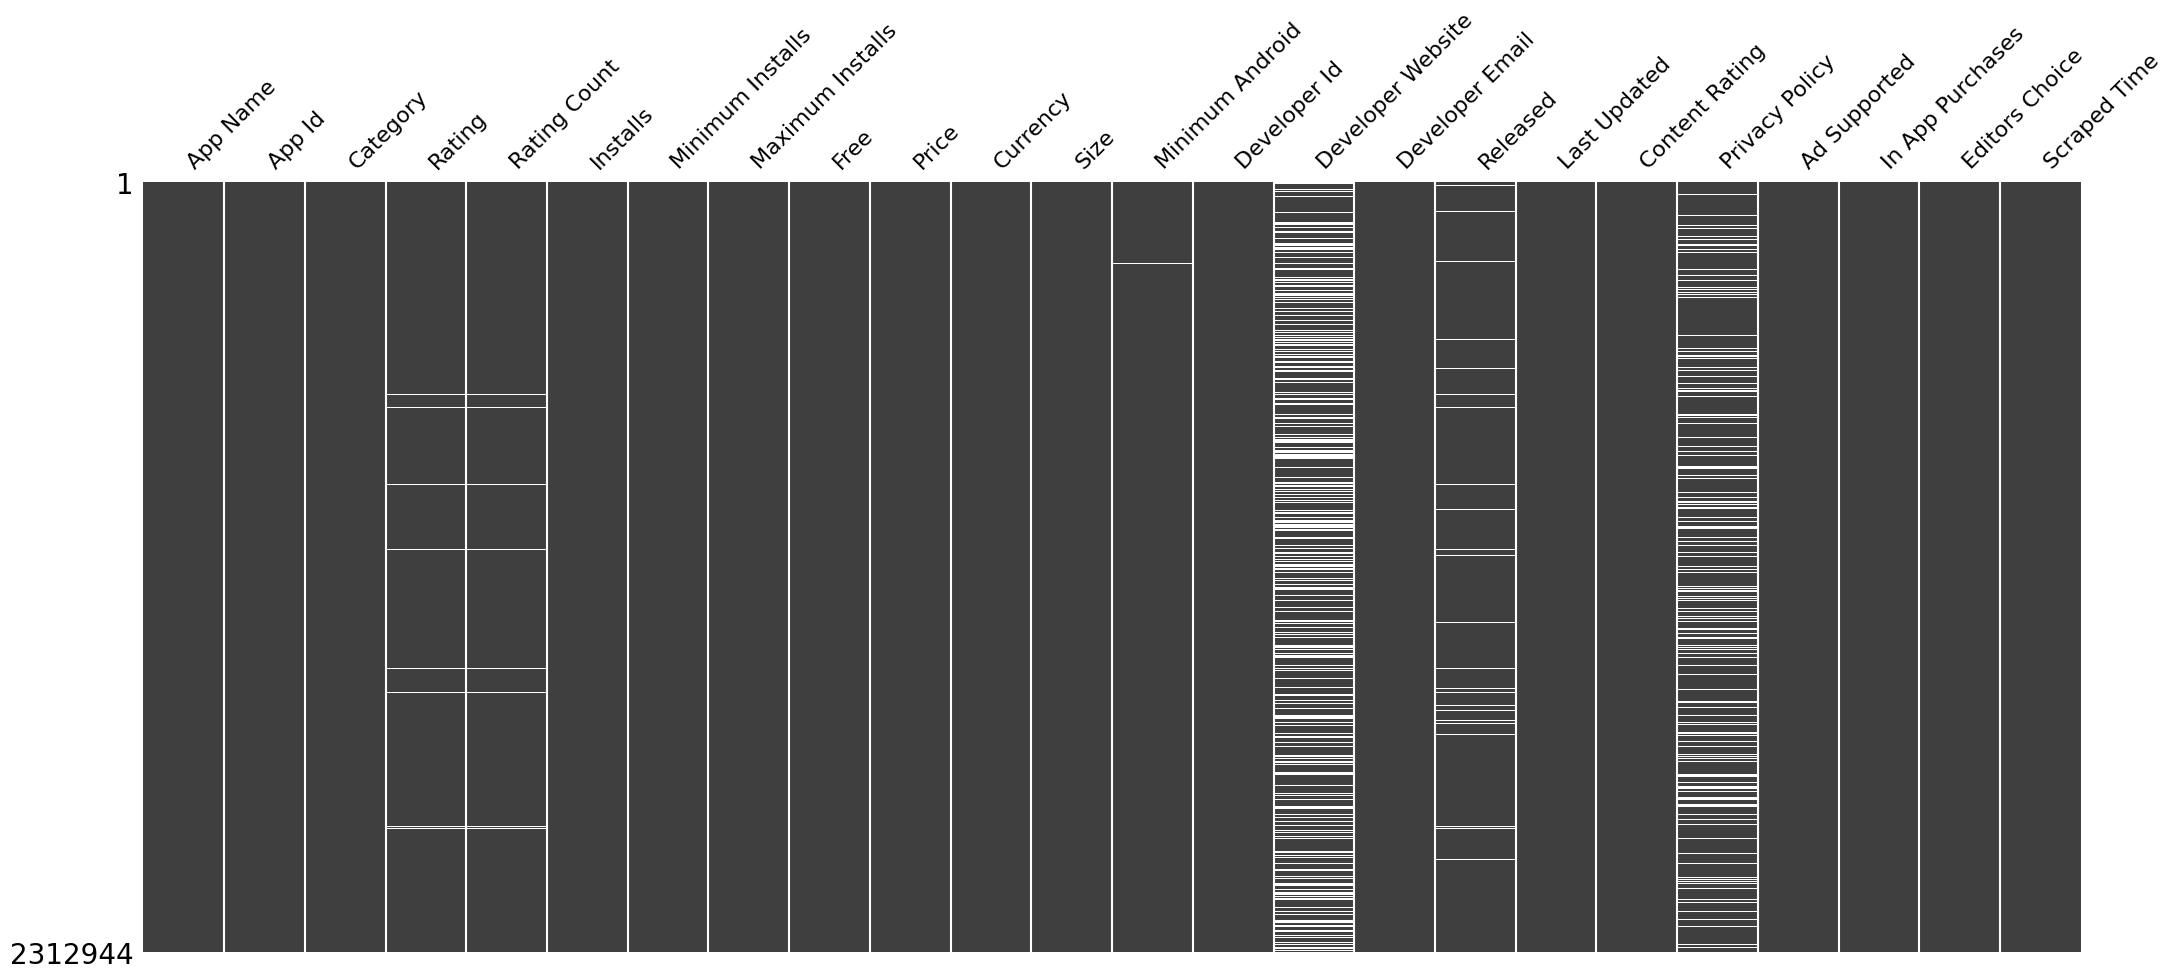

In [8]:
msno.matrix(df,sparkline=False)

# Удаляем значения

1. Столбцами с наибольшим процентом нулевых значений являются "Developer Website" и "Privacy Policy", которые не являются существенными для анализа. Следовательно, мы можем удалить эти столбцы.

2. Для других столбцов, таких как "Размер", "Currency", "Installs", "Мinimum Installs", "Developer Id" и "Developer Email", мы можем удалить строки с небольшими нулевыми значениями, поскольку они существенно не повлияют на общий анализ.

3. Такие столбцы, как "Released", "Rating" и "Rating Count", важны, и лучше заполнить их нулевыми значениями, а не удалять их.


In [9]:
df.dropna(subset=['App Name','Installs','Minimum Installs','Currency','Size','Developer Id','Developer Email'], inplace=True)

In [10]:
df.drop(columns=["Developer Website", "Privacy Policy"], inplace=True)

In [11]:
df.isnull().sum()

App Name                0
App Id                  0
Category                0
Rating              22572
Rating Count        22572
Installs                0
Minimum Installs        0
Maximum Installs        0
Free                    0
Price                   0
Currency                0
Size                    0
Minimum Android      6530
Developer Id            0
Developer Email         0
Released            70748
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

## Дублированные значения
Очищаем каждый ряд

Проверка наличия дубликатов в названии приложения

In [12]:
duplicated = df["App Name"].duplicated().any()
duplicated

True

In [13]:
df["App Name"].value_counts(ascending=False)

Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Foodiz Resto                      1
Astra OtoReward                   1
MedTerm Dictionary                1
Urban garden and sowing.          1
Biliyor Musun - Sonsuz Yarış      1
Name: App Name, Length: 2177593, dtype: int64

Основываясь на выводах из предыдущей ячейки, можно сделать вывод, что столбец "App Name" содержит повторяющиеся строки.\
Давайте проверим, идентичны данные в этих строках или нет

In [14]:
df[df["App Name"] == "Calculator"]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
13555,Calculator,com.asdapps.calculator,Productivity,5.0,5.0,10+,10.0,45,True,0.0,...,4.1 and up,ASD Apps,abdulkadir.dalal@gmail.com,"Jul 10, 2016","Jul 10, 2016",Everyone,False,False,False,2021-06-15 20:32:46
20965,Calculator,adel.kalu.calculator,Tools,0.0,0.0,5+,5.0,7,True,0.0,...,4.1 and up,Adel Kalu,adel.b.kalu@gmail.com,"Nov 30, 2020","Dec 01, 2020",Everyone,False,False,False,2021-06-15 20:40:02
21568,Calculator,calculatorswaya.voice,Tools,0.0,0.0,1+,1.0,3,True,0.0,...,4.1 and up,Alcea Technologies Pvt Ltd,support@alceatechnologies.com,"Nov 15, 2019","Nov 16, 2019",Everyone,False,False,False,2021-06-15 20:40:37
32421,Calculator,com.mobiletrendzy.calculator,Tools,5.0,8.0,100+,100.0,492,True,0.0,...,4.0 and up,Mobile Trendzy,help@mobiletrendzy.com,"Sep 22, 2016","Sep 22, 2016",Everyone,True,False,False,2021-06-15 20:51:43
51292,Calculator,appinventor.ai_miraanrai.calculator,Education,5.0,6.0,10+,10.0,14,True,0.0,...,2.1 and up,Miraan Rai,Miraanrai@gmail.com,"Feb 21, 2019","Feb 28, 2020",Everyone,False,False,False,2021-06-15 21:10:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252643,Calculator,com.spectensys.calculatorfree,Tools,4.3,4949.0,"1,000,000+",1000000.0,1238356,True,0.0,...,2.2 and up,Spectensys,spectensys@gmail.com,"Dec 21, 2013","Aug 23, 2017",Everyone,False,False,False,2021-06-16 12:06:10
2258272,Calculator,com.manikshakya.calculator,Tools,0.0,0.0,1+,1.0,3,True,0.0,...,4.1 and up,Manik Shakya,hotpop_manik1@yahoo.com,"Jul 6, 2020","Jul 07, 2020",Everyone,False,False,False,2021-06-16 12:11:12
2276810,Calculator,dhiman.nikhil.calculator,Finance,5.0,11.0,10+,10.0,28,True,0.0,...,4.1 and up,Nikhil Dhiman,nikhildhiman3644@gmail.com,"Oct 14, 2017","Oct 14, 2017",Everyone,False,False,False,2021-06-16 12:27:29
2278518,Calculator,com.jangolabs.vcalc,Tools,0.0,0.0,100+,100.0,149,True,0.0,...,4.1 and up,Jango Labs,support@jangolabs.com,"Jun 18, 2017","Jun 19, 2017",Everyone,False,False,False,2021-06-16 12:28:57


In [15]:
duplicated = df["App Id"].duplicated().any()
duplicated

False

In [16]:
df["App Id"].value_counts(ascending=False)

com.ishakwe.gakondo                    1
com.avai.amp.dewtour                   1
com.myhomebuy                          1
com.apocalipseescatologia.app          1
com.puzzlegame.wordconnect             1
                                      ..
id.compro.virtualcompetition           1
com.fitivity.basketball_point_guard    1
smartgr.gardenshower.ideas             1
com.euroland.mobiletools.ae_nbad       1
com.yyazilim.biliyormusun              1
Name: App Id, Length: 2312548, dtype: int64

# **Замена типа данных:**


In [17]:
df["Installs"].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

Нужно изменить тип данных в столбце "Installs"

In [18]:
# Удаляем символы
df["Installs"] = df["Installs"].str.split("+").str[0]
df.Installs

0               10
1            5,000
2               50
3               10
4              100
            ...   
2312939    100,000
2312940        100
2312941        100
2312942      1,000
2312943        100
Name: Installs, Length: 2312548, dtype: object

In [19]:
# Заменяем запятые "," в столбце "Installs"
df["Installs"].replace(",", "", regex=True, inplace=True) 
df.Installs

0              10
1            5000
2              50
3              10
4             100
            ...  
2312939    100000
2312940       100
2312941       100
2312942      1000
2312943       100
Name: Installs, Length: 2312548, dtype: object

In [20]:
# Меняем тип данных \ была проблема с изменением типа данных на int, нашел решение 'np.int64' для windows
df["Installs"] = df["Installs"].astype(np.int64)

In [21]:
df["Installs"].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000], dtype=int64)

# **Распределение размеров приложений**

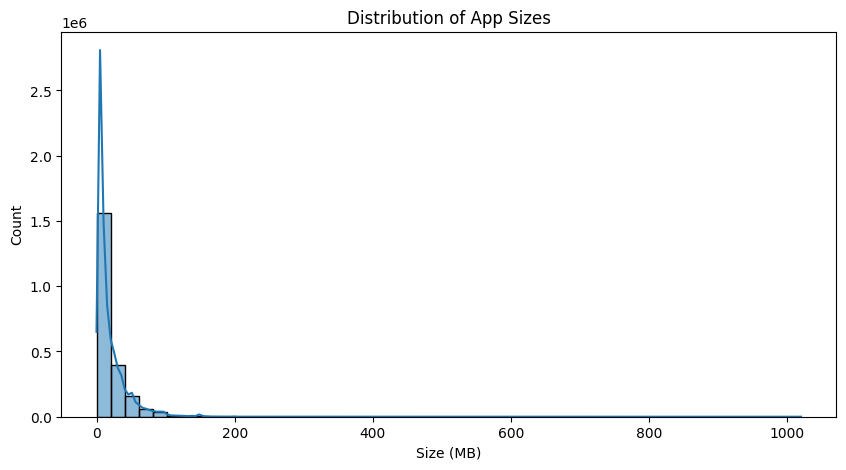

In [22]:
df['Size_MB'] = df['Size'].astype(str).apply\
(lambda x: float(x.replace(',', '').strip('M')) if 'M' in x else\
  (float(x.replace(',', '').strip('k')) / 1024 if 'k' in x else None))

plt.figure(figsize=(10, 5))
sns.histplot(df['Size_MB'].dropna(), kde=True, bins=50)
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Count')
plt.show()

# Задачи:
1. Какие 10 лучших категорий которые устанавливаются из магазина Google Play?
2. Какие категории чаще всего устанавливаются в топ-10?
3. Какая категория имеет самый высокий рейтинг?
4. В какой категории больше всего платных и бесплатных приложений?
5. Топ-5 платных приложений с самыми высокими рейтингами и количеством установок?
6. Топ-5 бесплатных приложений с самыми высокими рейтингами и количеством установок?

**1. Какие 10 лучших категорий которые устанавливаются из магазина Google Play?** \
 Берем топ 10 по количеству приложений в категориях и уже из них выявляем топ по количеству установок

In [23]:
df["Category"].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [24]:
df["Category"].value_counts()

Education                  241068
Music & Audio              154897
Tools                      143971
Business                   143749
Entertainment              138261
Lifestyle                  118321
Books & Reference          116716
Personalization             89207
Health & Fitness            83497
Productivity                79681
Shopping                    75240
Food & Drink                73918
Travel & Local              67279
Finance                     65450
Arcade                      53779
Puzzle                      51151
Casual                      50790
Communication               48157
Sports                      47473
Social                      44724
News & Magazines            42799
Photography                 35552
Medical                     32063
Action                      27539
Maps & Navigation           26721
Simulation                  23268
Adventure                   23193
Educational                 21302
Art & Design                18536
Auto & Vehicle

In [25]:
top_category = df["Category"].value_counts().reset_index().rename(columns={"Category" : "Count", "index" : "Category"})
top_category.head(10) #выявлили топ категорий по количеству приложений

,Category,Count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138261
5,Lifestyle,118321
6,Books & Reference,116716
7,Personalization,89207
8,Health & Fitness,83497
9,Productivity,79681


In [26]:
category_installs = df.groupby(["Category"])[["Installs"]].sum()
category_installs #количество установок приложений по категориям 

,Installs
Category,
Action,17399855328
Adventure,5390108856
Arcade,14501230855
Art & Design,1116398902
Auto & Vehicles,1594745418
Beauty,404328787
Board,3290826164
Books & Reference,4819175179
Business,5236661902


In [27]:
top_category_installs = pd.merge(top_category, category_installs, on="Category")
top_10_category_installs = top_category_installs.head(10).sort_values(by=["Installs"], ascending=False).reset_index()
top_10_category_installs # топ 10 категорий по установкам из топа по количеству в категории

,index,Category,Count,Installs
0,2,Tools,143971,71440271217
1,9,Productivity,79681,28313922253
2,4,Entertainment,138261,17108397933
3,1,Music & Audio,154897,14239401798
4,7,Personalization,89207,9252971243
5,5,Lifestyle,118321,5997921096
6,0,Education,241068,5983815847
7,3,Business,143749,5236661902
8,6,Books & Reference,116716,4819175179
9,8,Health & Fitness,83497,4586600201


<AxesSubplot: title={'center': 'Top 10 Installed Category'}, xlabel='Category', ylabel='Installs'>

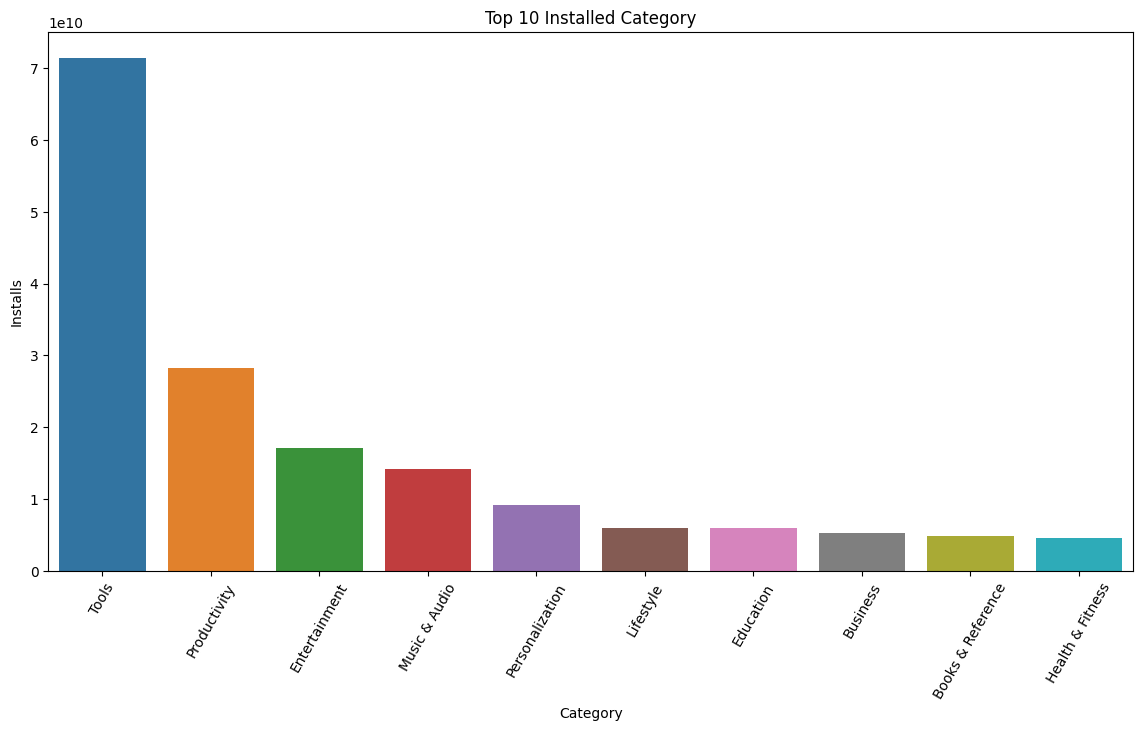

In [28]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of Application")
plt.title("Top 10 Installed Category")
sns.barplot(x=top_10_category_installs["Category"], y=top_10_category_installs["Installs"])

**Answer:**
1.  Tools
2.  Productivity
3.  Entertainment
4.  Music & Audio
5.  Personalization
6.  Lifestyle
7.  Education
8.  Business
9.  Books & Reference
10. Health & Fitness

**Топ 10 категорий по количеству установок (без учета количества приложений в категории)**

In [29]:
top_installed_app = top_category_installs
top_10_installed_app = top_installed_app.sort_values(by="Installs",ascending=False).reset_index().head(10)
top_10_installed_app

,index,Category,Count,Installs
0,2,Tools,143971,71440271217
1,17,Communication,48157,43216592414
2,9,Productivity,79681,28313922253
3,21,Photography,35552,18998958963
4,31,Video Players & Editors,14014,18591154109
5,23,Action,27539,17399855328
6,19,Social,44724,17165994565
7,4,Entertainment,138261,17108397933
8,16,Casual,50790,16836783725
9,14,Arcade,53779,14501230855


<AxesSubplot: title={'center': 'Top 10 Installed App'}, xlabel='Category', ylabel='Installs'>

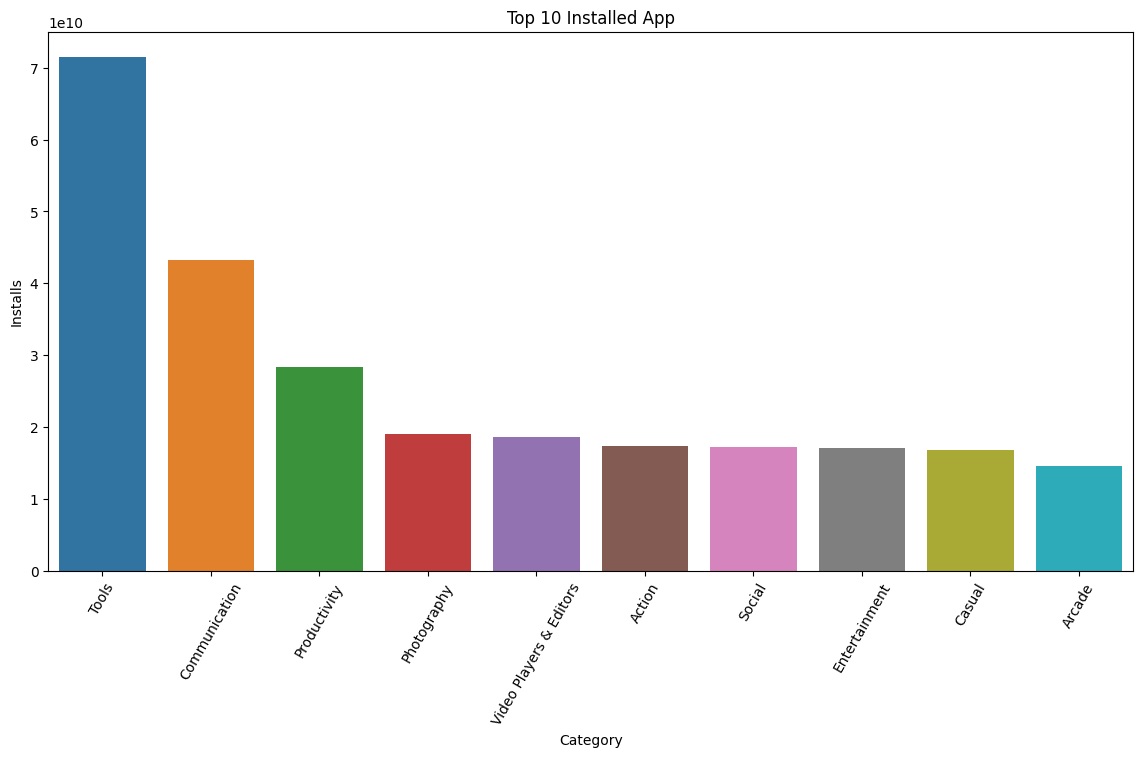

In [30]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of Application")
plt.title("Top 10 Installed App")
sns.barplot(x=top_10_installed_app["Category"], y=top_10_installed_app["Installs"])

**Answer:**
1.  Tools
2.  Communication
3.  Productivity
4.  Photography
5.  Video Players & Editors
6.  Action
7.  Social
8.  Entertainment
9.  Casual
10. Arcade



**2. Какие категории чаще всего устанавливаются в топ-10?**

In [31]:
top_10_category = top_category_installs.head(10).sort_values(by=["Count"], ascending=False).reset_index()
top_10_category #топ 10 категорий по количеству приложений и их установки

,index,Category,Count,Installs
0,0,Education,241068,5983815847
1,1,Music & Audio,154897,14239401798
2,2,Tools,143971,71440271217
3,3,Business,143749,5236661902
4,4,Entertainment,138261,17108397933
5,5,Lifestyle,118321,5997921096
6,6,Books & Reference,116716,4819175179
7,7,Personalization,89207,9252971243
8,8,Health & Fitness,83497,4586600201
9,9,Productivity,79681,28313922253


<AxesSubplot: title={'center': 'Top 10 Category'}, xlabel='Category', ylabel='Count'>

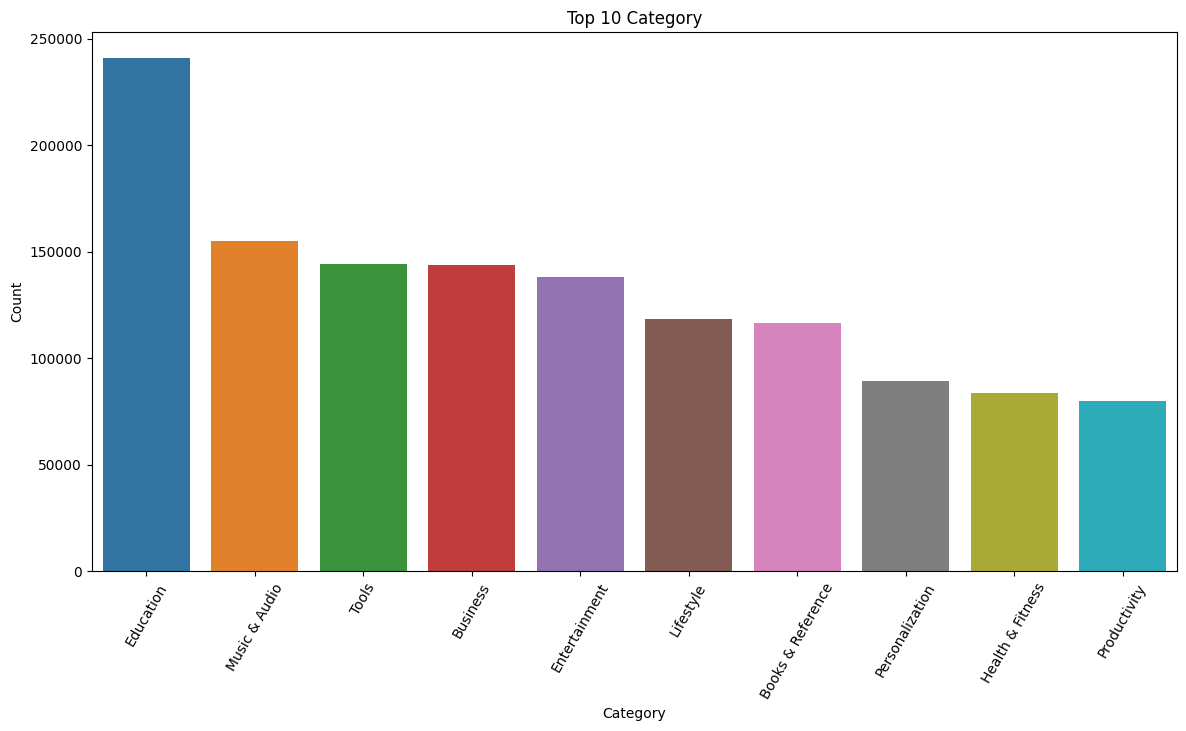

In [32]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of Application")
plt.title("Top 10 Category")
sns.barplot(x=top_10_category["Category"], y=top_10_category["Count"])

**Answer:**
1.  Education
2.  Music & Audio
3.  Tools
4.  Business
5.  Entertainment
6.  Lifestyle
7.  Books & Reference
8.  Personalization
9.  Health & Fitness
10. Productivity

# **Анализ:**
Из двух приведенных выше графиков видно, что максимальное количество приложений в Google Play Store попадает под категории "Education", "Music & Audio", "Tools", "Business", "Entertainment" и т.д. Однако, когда дело доходит до установок, сценарий меняется. Максимальное количество установленных приложений относится к категориям "Tools", "Productivity", "Entertainment", "Music & Audio" и т.д.

**Визуализация общего количества категорий и количества приложений в каждой категории**

<AxesSubplot: title={'center': 'Total Categories and Count of Applications in each Category'}, xlabel='Category', ylabel='Count'>

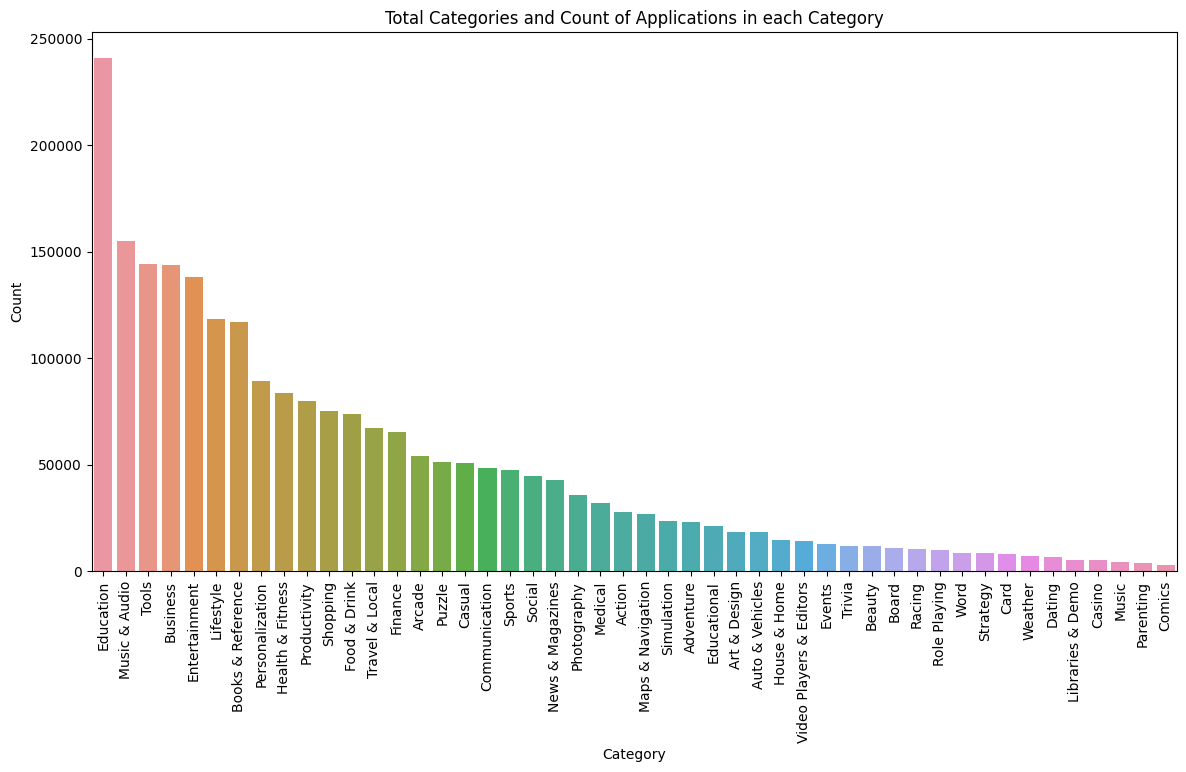

In [33]:
plt.figure(figsize = (14,7))
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Number of Applications")
plt.title("Total Categories and Count of Applications in each Category")
sns.barplot(x = top_category_installs.Category, y = top_category_installs.Count)

**Визуализация общего количества категорий и установленного приложения в каждой категории**

<AxesSubplot: title={'center': 'Total Categories and Installation of Applications in each Category'}, xlabel='Category', ylabel='Installs'>

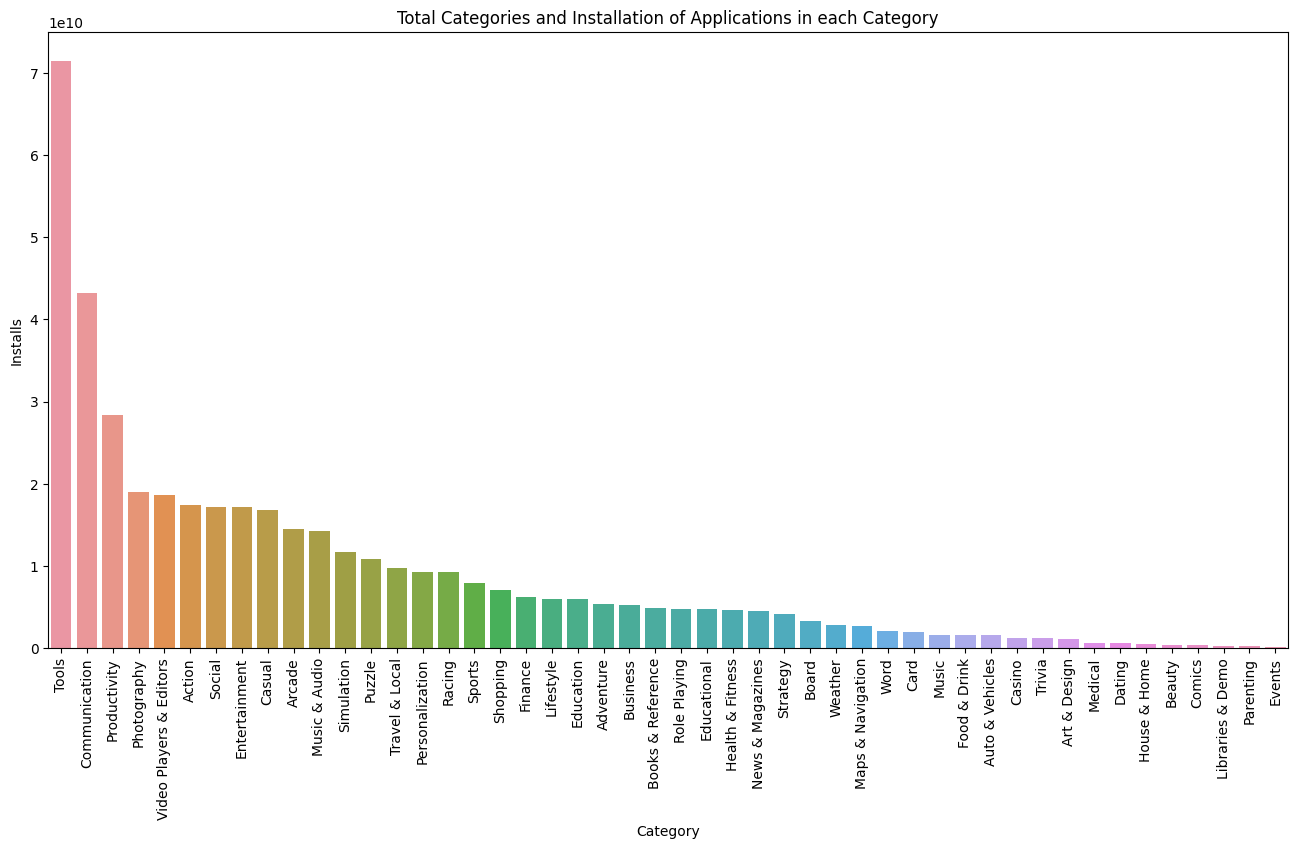

In [34]:
top_category_installed = top_category_installs.sort_values(by="Installs", ascending=False)
plt.figure(figsize = (16,8))
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Number of Applications")
plt.title("Total Categories and Installation of Applications in each Category")
sns.barplot(x = top_category_installed.Category, y = top_category_installed.Installs)

**3. Какая категория имеет самый высокий рейтинг?**

**Распределение рейтинга:**

Text(0.5, 1.0, 'Distribution of Rating')

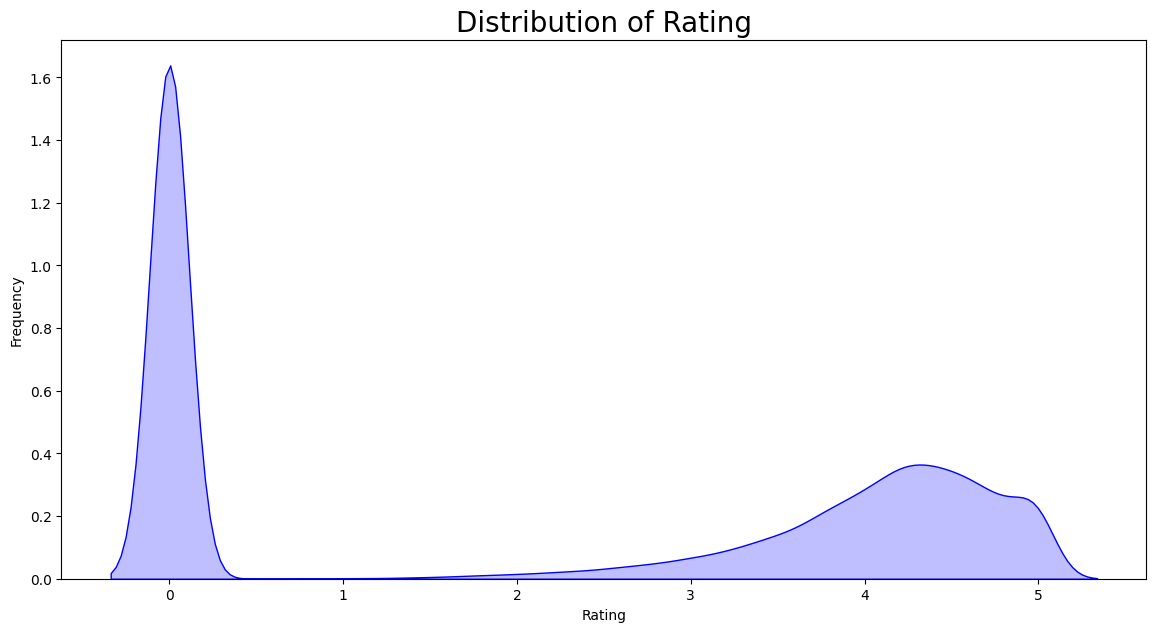

In [35]:
plt.figure(figsize = (14,7))
g = sns.kdeplot(df.Rating, color = "Blue", fill = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title("Distribution of Rating", size = 20)

<AxesSubplot: title={'center': 'Rating'}, xlabel='Rating', ylabel='Count'>

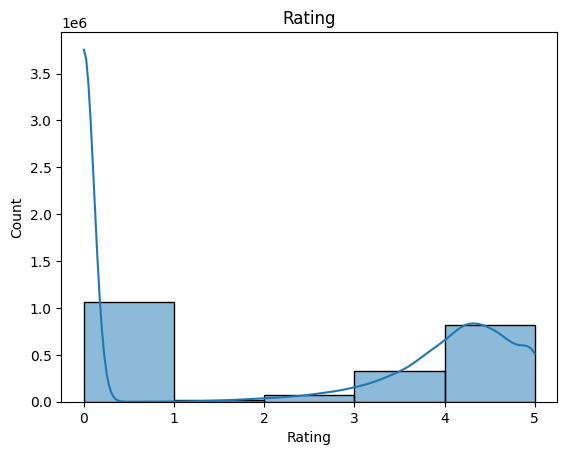

In [36]:
plt.title("Rating")
sns.histplot(df.Rating, kde = True, bins = 5)

# **Анализ:**
Приведенные выше два графика показывают, что большая часть приложений в наборе данных не была оценена пользователями. Однако, также заметно, что когда пользователи все-таки ставят оценку, они, как правило, ставят высокую оценку - 4 или выше.

In [37]:
category_rating = df.groupby(["Category"])[["Rating"]].mean().sort_values(by="Rating", ascending=False).reset_index()
category_rating.head(10)

,Category,Rating
0,Role Playing,3.384498
1,Casino,3.279682
2,Simulation,3.210887
3,Weather,3.120171
4,Card,3.085171
5,Racing,2.960385
6,Video Players & Editors,2.903842
7,Word,2.902076
8,Strategy,2.878900
9,Comics,2.864906


<AxesSubplot: title={'center': 'All Category Rating'}, xlabel='Category', ylabel='Rating'>

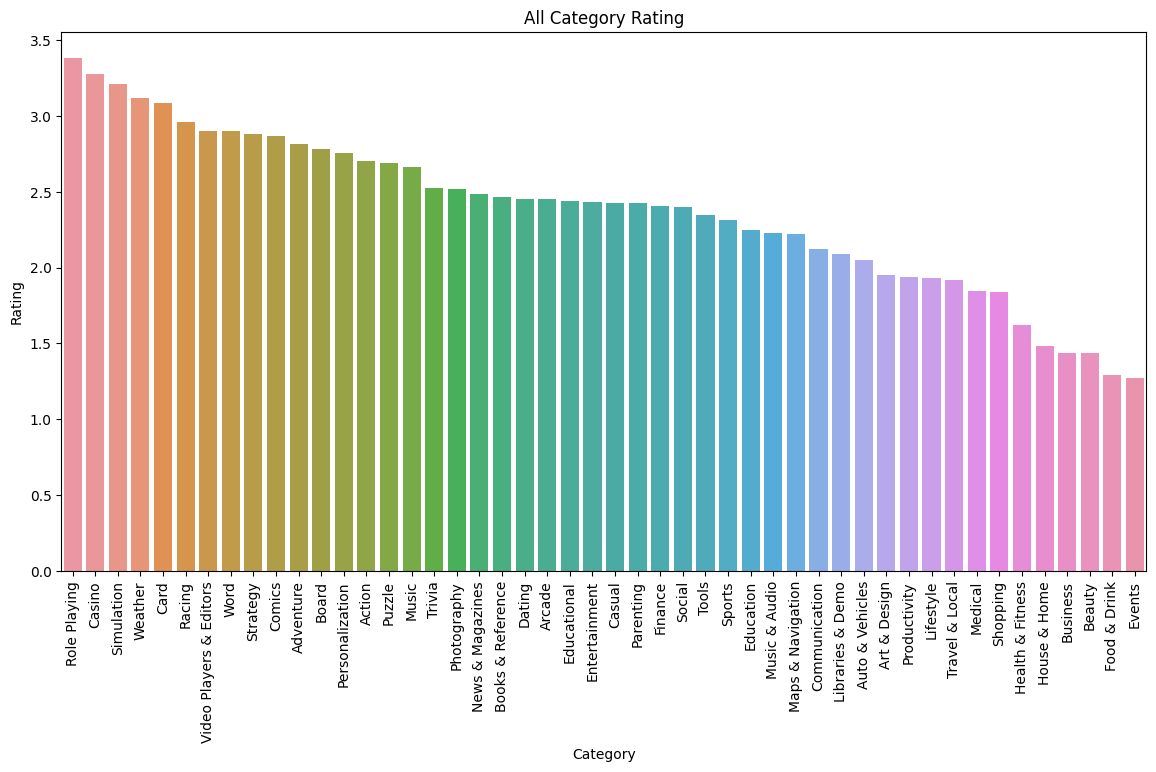

In [38]:
plt.figure(figsize = (14,7))
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("All Category Rating")
sns.barplot(x = category_rating["Category"], y = category_rating["Rating"])

**Ответ:**
Приведенный выше график показывает, что категория **Role Playing** имеет самый высокий средний рейтинг по сравнению с другими категориями.

**4. В какой категории больше всего платных и бесплатных приложений?**

# **Соотношение платных к бесплатным:**

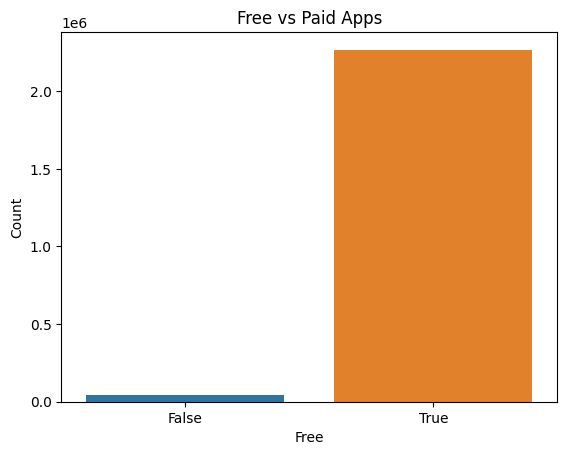

In [39]:
sns.countplot(x='Free', data=df)
plt.title('Free vs Paid Apps')
plt.xlabel('Free')
plt.ylabel('Count')
plt.show()

# **Распределение рейтингов для бесплатных и платных приложений**

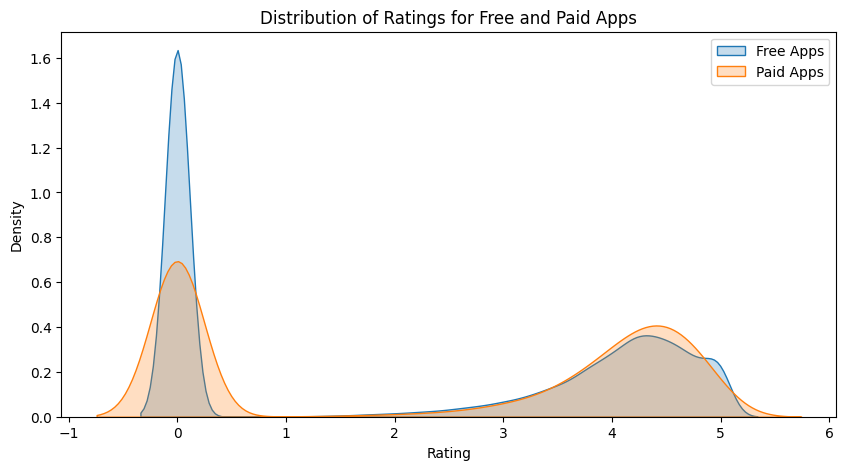

In [40]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['Free'] == True]['Rating'], label='Free Apps', fill=True)
sns.kdeplot(data=df[df['Free'] == False]['Rating'], label='Paid Apps', fill=True)
plt.title('Distribution of Ratings for Free and Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()


In [41]:
df["Type"] = "Paid"
df.loc[(df["Free"] == True, "Type")] = "Free"

In [42]:
df.Type.value_counts()

Free    2267619
Paid      44929
Name: Type, dtype: int64

In [43]:
category_paid_free = pd.crosstab(df["Category"],df["Type"])
category_paid_free.head(10)

Type,Free,Paid
Category,,
Action,26953,586
Adventure,22211,982
Arcade,53016,763
Art & Design,18364,172
Auto & Vehicles,17994,282
Beauty,11757,14
Board,10223,364
Books & Reference,113119,3597
Business,143079,670


In [44]:
category_paid_free.sort_values(by="Paid", ascending=False).head(10)

Type,Free,Paid
Category,,
Education,234521,6547
Personalization,83440,5767
Tools,139894,4077
Books & Reference,113119,3597
Productivity,77950,1731
Music & Audio,153373,1524
Travel & Local,65865,1414
Health & Fitness,82085,1412
Entertainment,136880,1381


Text(0.5, 1.0, 'Free and Paid Apps in Category')

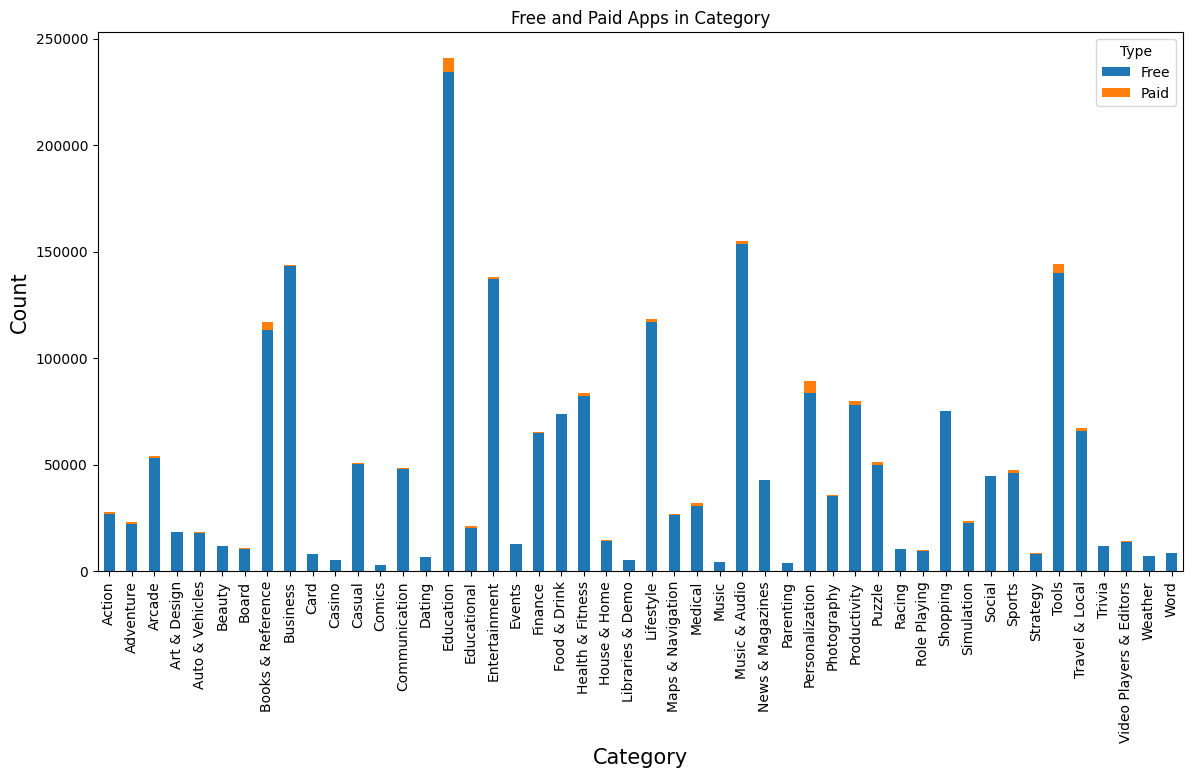

In [45]:
category_paid_free.plot(kind = "bar", stacked = True, figsize = (14,7))
plt.xlabel("Category", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Free and Paid Apps in Category")

In [46]:
pd.crosstab(df["Category"],df["Type"]).apply(lambda x: round(x/x.sum()*100,1), axis=1).sort_values(by="Paid", ascending=False)

Type,Free,Paid
Category,,
Role Playing,93.3,6.7
Strategy,93.4,6.6
Personalization,93.5,6.5
Educational,94.8,5.2
Medical,95.7,4.3
Adventure,95.8,4.2
Card,96.5,3.5
Board,96.6,3.4
Weather,96.7,3.3


 **Ответ:**
В категории "Education" самое большое количество платных приложений в списке.\
Доля категории Role Playing в списке платных приложений составляет 6,7%, что является самым высоким показателем среди всех категорий.



**5. Топ-5 платных приложений с самыми высокими рейтингами и количеством установок**

In [47]:
df["Installs"].max()

10000000000

In [48]:
paid_installs_apps = df[(df.Type=="Paid") & (df.Installs >= 5000000)]
paid_installs_apps


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Size_MB,Type
6302,True Skate,com.trueaxis.trueskate,Sports,4.4,191460.0,5000000,5000000.0,7040478,False,1.99,...,support.android@trueskate.com,"Jul 19, 2013","Jun 07, 2021",Everyone,True,True,False,2021-06-15 20:25:39,99.0,Paid
508696,Hitman Sniper,com.squareenixmontreal.hitmansniperandroid,Action,4.4,854992.0,10000000,10000000.0,24958893,False,0.99,...,support@square-enix-montreal.mail.helpshift.com,"Jun 3, 2015","Aug 24, 2020",Mature 17+,True,True,True,2021-06-16 04:42:58,48.0,Paid
837351,Minecraft,com.mojang.minecraftpe,Arcade,4.6,4132618.0,10000000,10000000.0,36183322,False,7.49,...,help@minecraft.net,"Aug 15, 2011","May 27, 2021",Everyone 10+,False,True,True,2021-06-16 09:47:13,NaN,Paid
1859983,Stickman Legends-Shadow Fight Premium Offline ...,com.zitga.ninja.stickman.legends.shadow.wars,Action,4.3,235762.0,10000000,10000000.0,13264461,False,0.99,...,StickmanLegends@zitga.com.vn,"May 10, 2017","Jun 08, 2021",Everyone 10+,True,True,False,2021-06-16 06:24:42,126.0,Paid
1933739,Poweramp Full Version Unlocker,com.maxmpz.audioplayer.unlock,Music & Audio,4.2,55111.0,5000000,5000000.0,5481771,False,4.99,...,poweramp.maxmpz@gmail.com,"Nov 7, 2010","Jan 20, 2020",Everyone,False,False,False,2021-06-16 07:28:13,NaN,Paid
2052997,League of Stickman 2020- Ninja Arena PVP(Dream...,me.dreamsky.stickman,Action,4.1,65269.0,5000000,5000000.0,5621942,False,0.99,...,leagueofstickman@dreamsky.me,"Sep 3, 2016","Dec 30, 2020",Teen,True,True,False,2021-06-16 09:12:31,44.0,Paid


In [49]:
paid_installs_rating_apps = paid_installs_apps.groupby(["App Name"])[["Rating"]].max().sort_values(by="Rating",ascending = False)
paid_installs_rating_apps


,Rating
App Name,
Minecraft,4.6
Hitman Sniper,4.4
True Skate,4.4
Stickman Legends-Shadow Fight Premium Offline Game,4.3
Poweramp Full Version Unlocker,4.2
League of Stickman 2020- Ninja Arena PVP(Dreamsky),4.1


**Ответ:**
* Minecraft 
* Hitman Sniper 
* True Skate 
* Stickman Legends-Shadow Fight Premium Offline Game 
* Poweramp Full Version Unlocker 
* League of Stickman 2020- Ninja Arena PVP(Dreamsky)

**6. Топ-5 бесплатных приложений с самыми высокими рейтингами и количеством установок**

In [50]:
free_installs_apps = df[(df.Type=="Free") & (df.Installs >= 5000000)]
free_installs_apps

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Size_MB,Type
92,Car Games Revival: Car Racing Games for Kids,com.lf.real.extreme.suv.offroad.drive.games.free,Racing,3.9,55218.0,10000000,10000000.0,30052692,True,0.0,...,info.abstron@gmail.com,"Nov 9, 2016","Jun 12, 2021",Everyone,True,True,False,2021-06-15 20:19:40,43.0,Free
291,Taxsee Driver,com.taxsee.driver,Maps & Navigation,4.4,246.0,5000000,5000000.0,6864573,True,0.0,...,support@taxsee.ru,"Oct 27, 2011","May 24, 2021",Everyone,False,False,False,2021-06-15 20:19:53,18.0,Free
472,MONOMAX บริการดูหนังออนไลน์,com.doonung.activity,Entertainment,3.7,22803.0,5000000,5000000.0,5278071,True,0.0,...,monofilm.movie@gmail.com,NaN,"Jun 04, 2021",Teen,False,False,False,2021-06-15 20:20:03,20.0,Free
561,Web Browser & Fast Explorer,fast.explorer.web.browser,Social,4.4,103945.0,10000000,10000000.0,13629503,True,0.0,...,smartchen2015@gmail.com,"May 19, 2016","Apr 09, 2021",Everyone,True,False,False,2021-06-15 20:20:08,6.8,Free
631,Piano Melody,com.veitch.themelodymaster.pmf,Education,4.2,66049.0,10000000,10000000.0,13882293,True,0.0,...,LearnToMasterLtd@gmail.com,"Nov 26, 2010","Jun 09, 2021",Everyone,True,True,False,2021-06-15 20:20:12,9.3,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312253,Bubble Champion,champion.bubble,Puzzle,4.2,52395.0,10000000,10000000.0,12892286,True,0.0,...,support@ilyon.net,"Oct 19, 2017","Jun 01, 2021",Everyone,True,True,False,2021-06-16 12:58:42,29.0,Free
2312298,Mp3 Player,mp3.music.download.player.music.search,Music & Audio,4.6,824440.0,10000000,10000000.0,29468091,True,0.0,...,sreejaksreeja007@gmail.com,"Apr 1, 2016","May 30, 2021",Everyone,True,False,False,2021-06-16 12:58:44,NaN,Free
2312316,Design It Girl - Fashion Salon,com.tabtale.tailorboutique,Casual,3.6,87553.0,10000000,10000000.0,22226621,True,0.0,...,support@tabtale.com,"Jan 10, 2017","Apr 28, 2021",Everyone,True,True,False,2021-06-16 12:58:45,61.0,Free
2312677,Modern Strike : Multiplayer FPS - Critical Action,com.shoot.hotheadgame.anti,Role Playing,3.9,78351.0,10000000,10000000.0,24015387,True,0.0,...,fun.game.jhon@gmail.com,"Aug 6, 2020","May 12, 2021",Teen,True,True,False,2021-06-16 12:59:05,NaN,Free


In [51]:
free_installs_rating_apps = free_installs_apps.groupby(["App Name"])[["Rating"]].max().sort_values(by="Rating",ascending = False).head(5)
free_installs_rating_apps

,Rating
App Name,
Maps Master for Minecraft,5.0
Photo Frame,5.0
Video maker with photo & music,5.0
"Kuku FM - Love Stories, Audio Books & Podcasts",5.0
Plank Workout at Home - 30 Days Plank Challenge,4.9


**Ответ:**
* Maps Master for Minecraft
* Photo Frame
* Video maker with photo & music 
* Kuku FM- Love Stories 
* Audio Books & Podcasts 
* Plank Workout at Home

![image.png](let_me_in.jpg)